In [1]:
from google_drive_downloader.google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1s4bVYjVwfHBPIcy6W5XAm4sjrGMjFlG_',
                                    dest_path='/content/train.zip',
                                    unzip=True)
gdd.download_file_from_google_drive(file_id='1_0Rzyx9A41WqeAja2seZEmEw2_OGKPg3',
                                    dest_path='/content/test.zip',
                                    unzip=True)

Unzipping...Done.
Unzipping...Done.


In [2]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import cv2 
import matplotlib.pyplot as plt


In [3]:
batch_size=100

train_data_ex = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)

train_generator = train_data_ex.flow_from_directory(
        '/content/training',  
        target_size=(64,64),
        batch_size=batch_size,
        class_mode='binary')

val_data_ex = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

val_generator = val_data_ex.flow_from_directory(
    '/content/training',
    target_size=(64,64),
    batch_size=batch_size,
    subset = 'validation' ,
    class_mode='binary')

Found 5875 images belonging to 2 classes.
Found 1175 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'background': 0, 'hi': 1}

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=8, strides=1, activation='relu', input_shape=(64,64,3),padding="same"))
#model.add(layers.BatchNormalization(epsilon=0.7))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_size=4, strides=1, activation='relu', padding="same"))
#model.add(layers.BatchNormalization(epsilon=0.7))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, kernel_size=4, strides=1, activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16, kernel_size=2, strides=1, activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True,
    save_freq=1000)
'''

#model.fit(train_generator, steps_per_epoch=10, epochs=200, batch_size=100)#,callbacks=[model_checkpoint_callback]) 
history=model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=50,
    batch_size=100,
    validation_data =val_generator,
    validation_steps=10
)

model.save('/content/drive/MyDrive/Tensored.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       24704     
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        131136    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2

<Figure size 432x288 with 0 Axes>

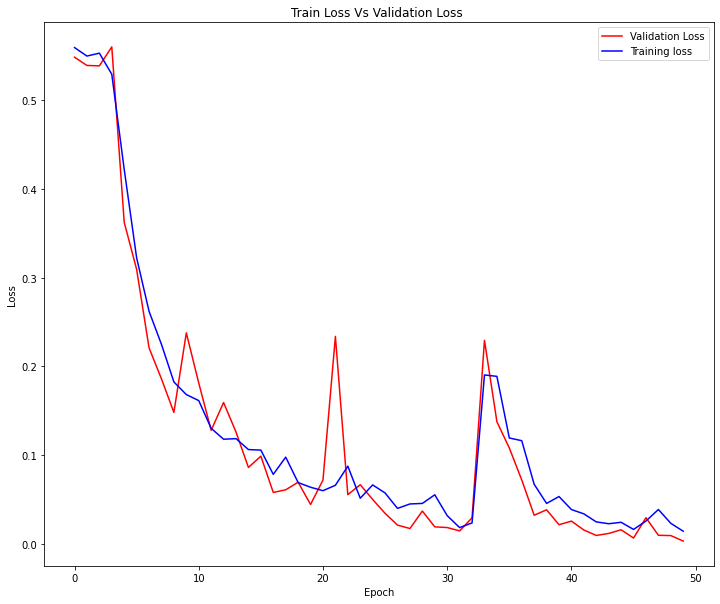

In [6]:
val_loss=history.history['val_loss']
train_loss=history.history['loss']

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig, axs = plt.subplots(1, 1,figsize=(12,10))
axs.set_title("Train Loss Vs Validation Loss ")
axs.plot(val_loss, label='Validation Loss',color='red')
axs.plot(train_loss, label = 'Training loss ',color='blue')
axs.set_xlabel('Epoch')
axs.set_ylabel('Loss')
axs.legend(loc='upper right')

In [10]:
l2 = [1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0]

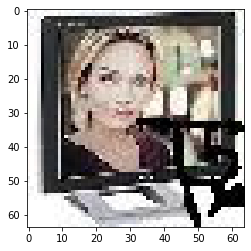

1  - 1 -  1


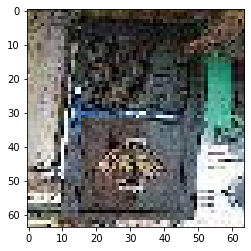

2  - 0 -  0


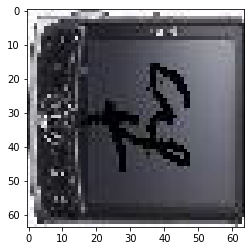

3  - 1 -  1


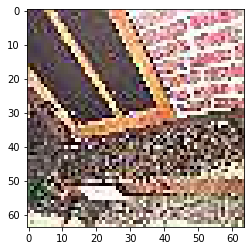

4  - 0 -  0


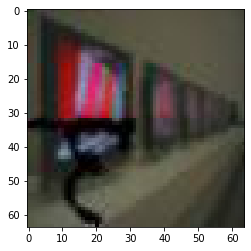

5  - 1 -  1


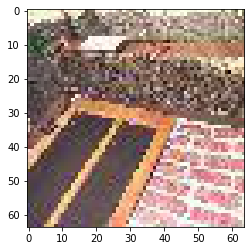

6  - 0 -  0


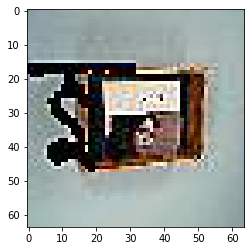

7  - 1 -  1


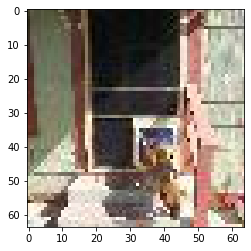

8  - 0 -  0


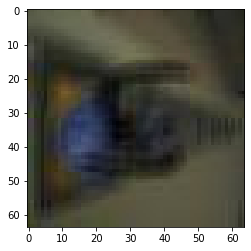

9  - 1 -  1


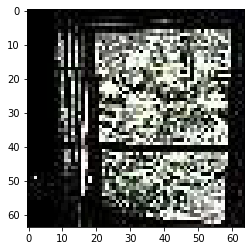

10  - 0 -  0


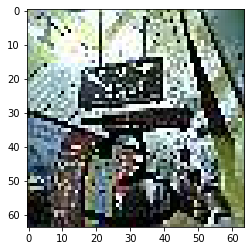

11  - 1 -  0


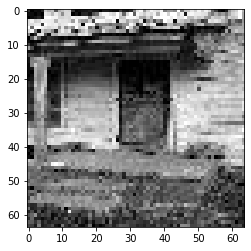

12  - 0 -  0


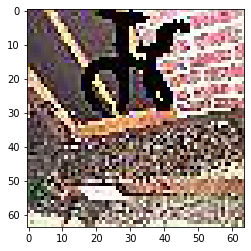

13  - 1 -  1


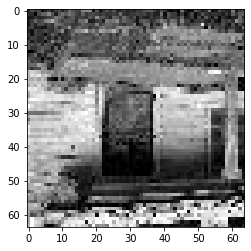

14  - 0 -  0


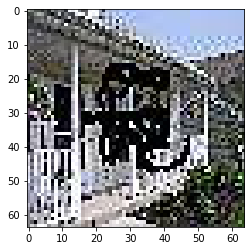

15  - 1 -  1


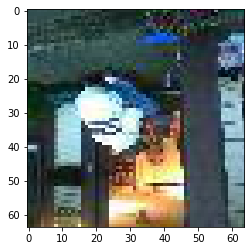

16  - 0 -  0


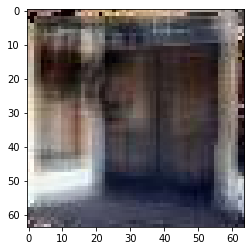

17  - 1 -  0


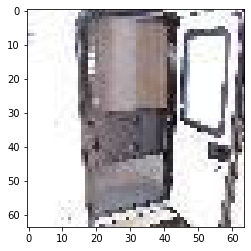

18  - 0 -  0


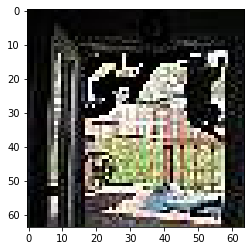

19  - 1 -  0


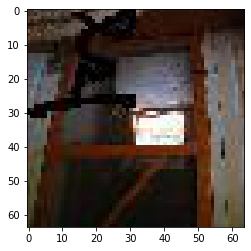

20  - 1 -  1


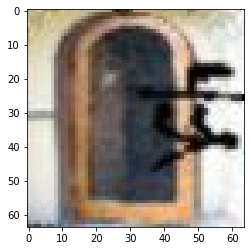

21  - 1 -  1


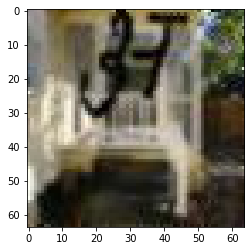

22  - 1 -  1


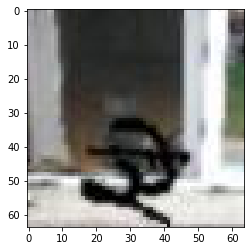

23  - 1 -  1


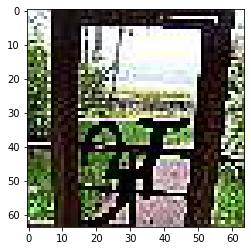

24  - 1 -  1


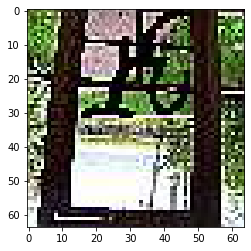

25  - 1 -  1


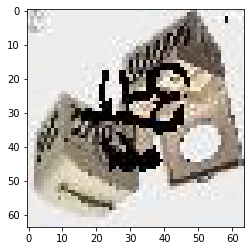

26  - 1 -  1


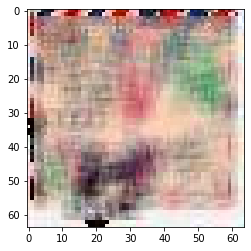

27  - 1 -  0


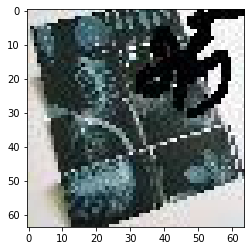

28  - 1 -  1


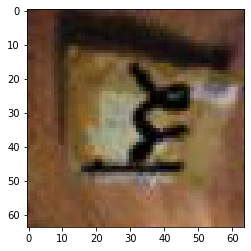

29  - 1 -  1


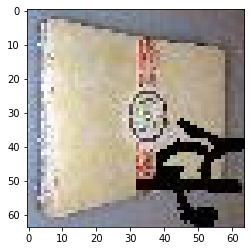

30  - 1 -  1


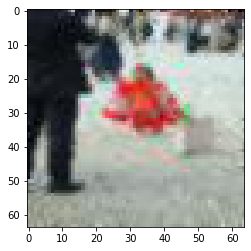

31  - 0 -  0


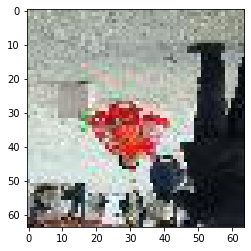

32  - 0 -  0


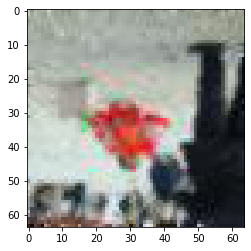

33  - 0 -  0


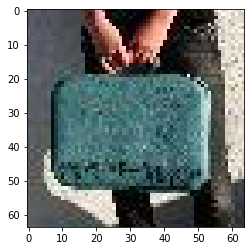

34  - 0 -  0


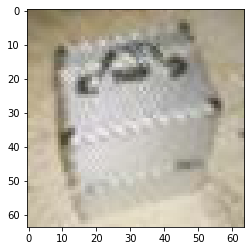

35  - 0 -  0


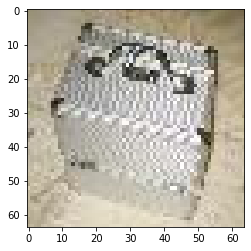

36  - 0 -  0


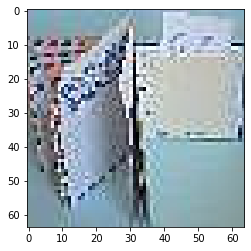

37  - 0 -  0


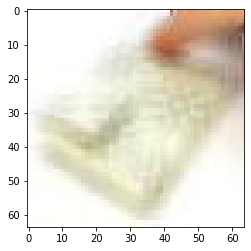

38  - 0 -  0


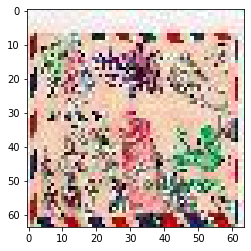

39  - 0 -  0


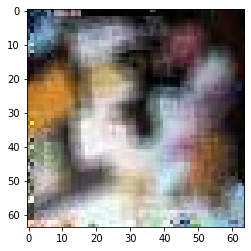

40  - 1 -  1


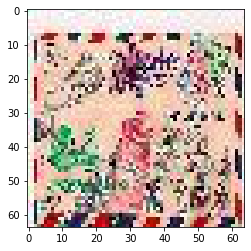

41  - 0 -  0


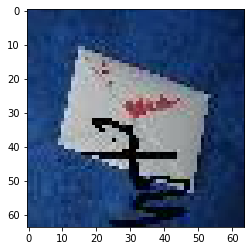

42  - 1 -  1


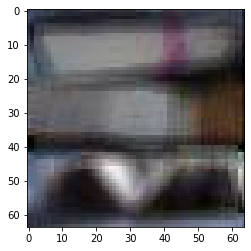

43  - 0 -  0


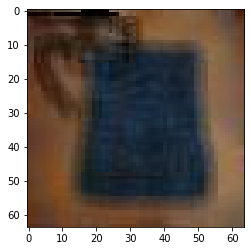

44  - 1 -  1


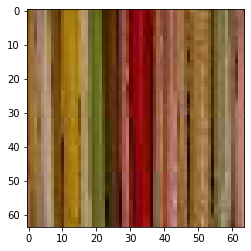

45  - 0 -  0


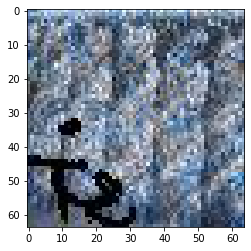

46  - 1 -  1


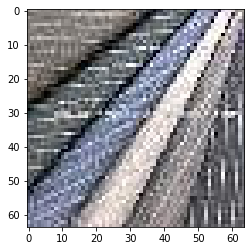

47  - 0 -  0


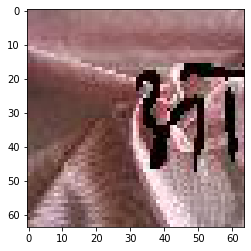

48  - 1 -  1


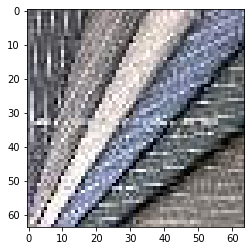

49  - 0 -  0


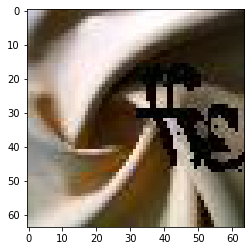

50  - 1 -  1


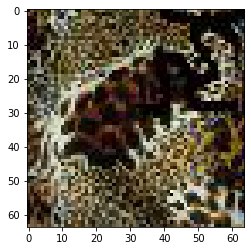

51  - 1 -  1


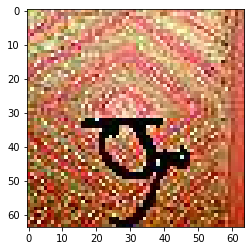

52  - 1 -  1


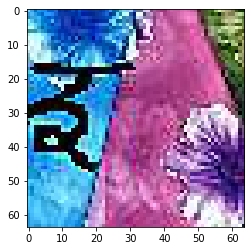

53  - 1 -  1


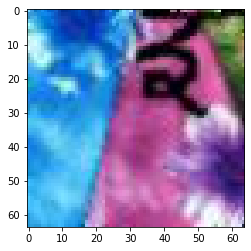

54  - 1 -  1


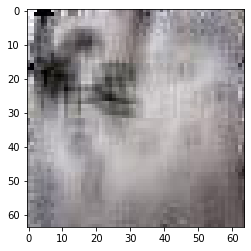

55  - 1 -  0


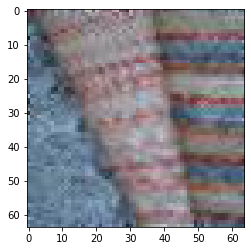

56  - 0 -  0


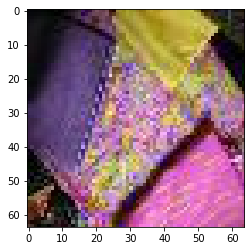

57  - 0 -  0


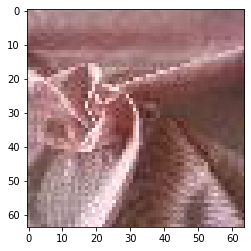

58  - 0 -  0


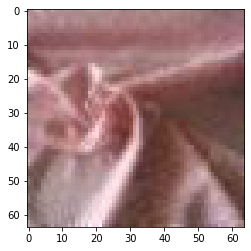

59  - 0 -  0


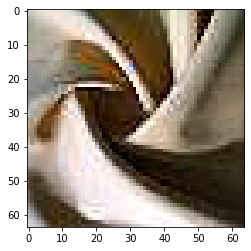

60  - 0 -  0


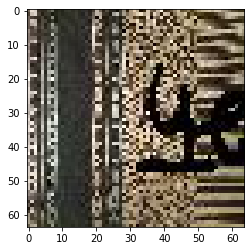

61  - 1 -  1


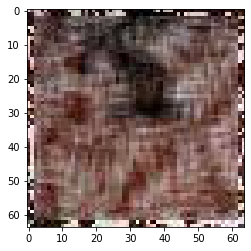

62  - 1 -  1


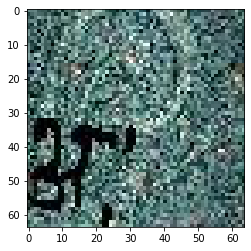

63  - 1 -  1


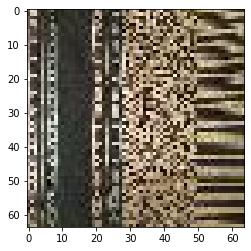

64  - 0 -  0


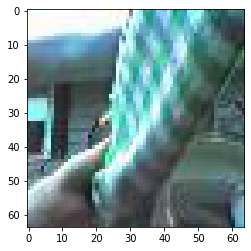

65  - 0 -  0


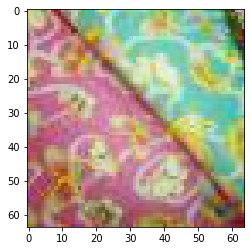

66  - 0 -  0


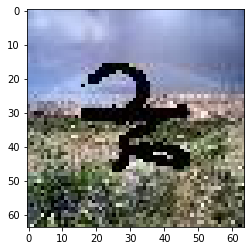

67  - 1 -  1


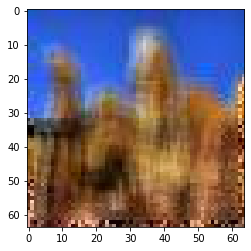

68  - 1 -  0


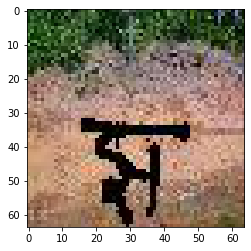

69  - 1 -  1


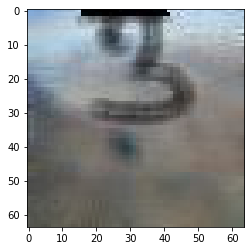

70  - 1 -  1


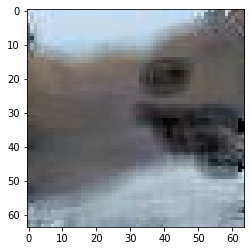

71  - 1 -  1


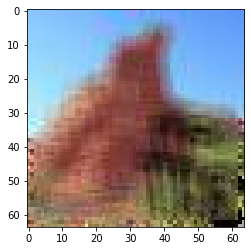

72  - 1 -  0


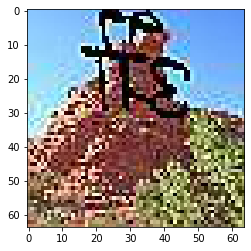

73  - 1 -  1


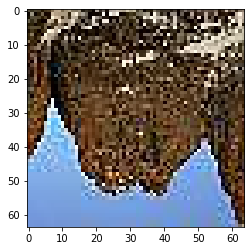

74  - 0 -  0


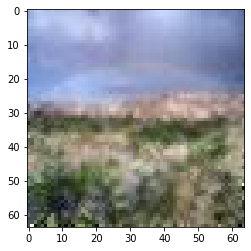

75  - 0 -  0


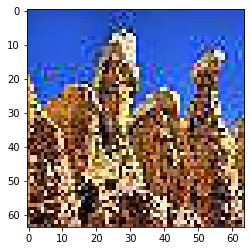

76  - 0 -  0


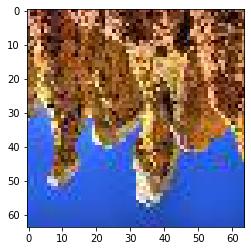

77  - 0 -  0


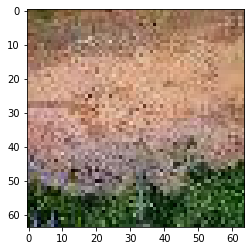

78  - 0 -  0


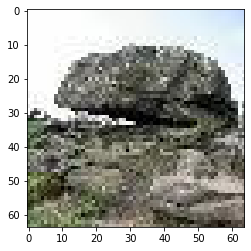

79  - 0 -  0


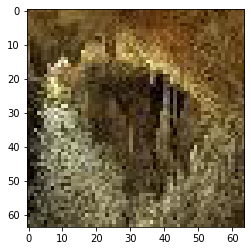

80  - 0 -  0


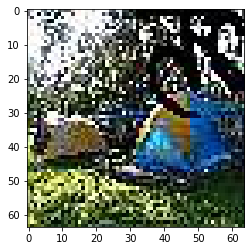

81  - 1 -  1


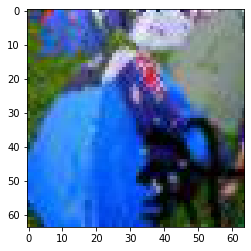

82  - 1 -  1


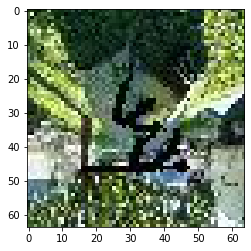

83  - 1 -  1


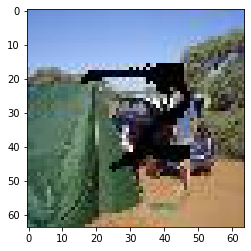

84  - 1 -  1


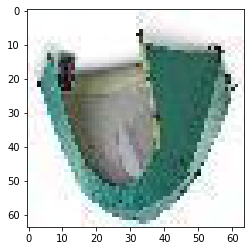

85  - 0 -  0


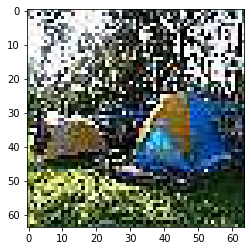

86  - 0 -  0


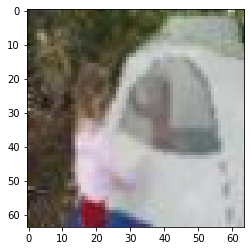

87  - 0 -  0


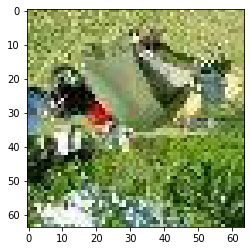

88  - 0 -  0


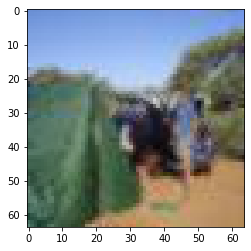

89  - 0 -  0


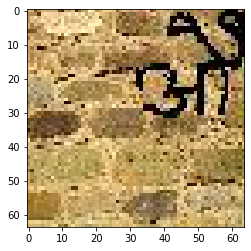

90  - 1 -  1


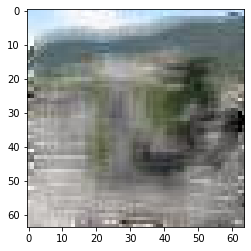

91  - 1 -  1


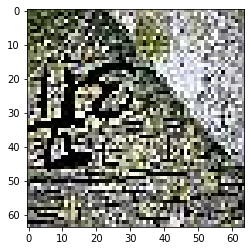

92  - 1 -  1


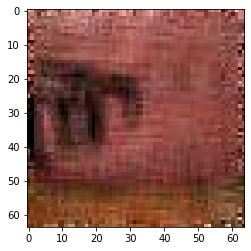

93  - 1 -  1


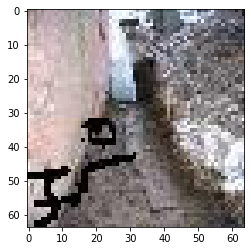

94  - 1 -  1


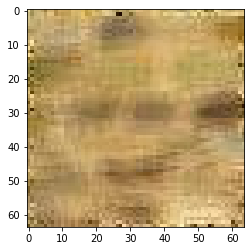

95  - 0 -  0


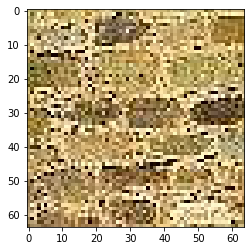

96  - 0 -  0


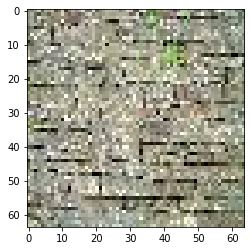

97  - 0 -  0


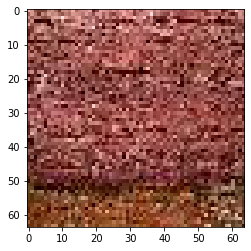

98  - 0 -  0


In [11]:
import os
res={}
new_model=models.load_model("/content/drive/MyDrive/Tensored.h5")
for i in range(1,99):
  img = image.load_img('/content/test/'+str(i)+'.jpg')
  plt.imshow(img)
  plt.show()
  

  X = image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images =  np.vstack([X])
  value = model.predict(images)
  if value==0:
    print(i," - 0 - ",l2[i-1])
  else:
    print(i," - 1 - ",l2[i-1])
  
  test_set = str(i) + '.jpg'
  res[test_set] = int(value[0][0])


(1, 32, 32, 128)
(1, 32, 32, 64)
(1, 16, 16, 64)
(1, 16, 16, 32)
(1, 8, 8, 32)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 4, 4, 16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


(1, 256)
(1, 1024)
(1, 1)


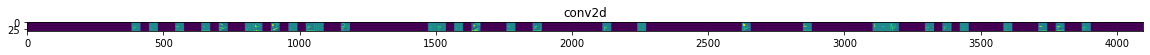

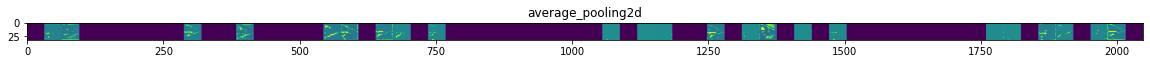

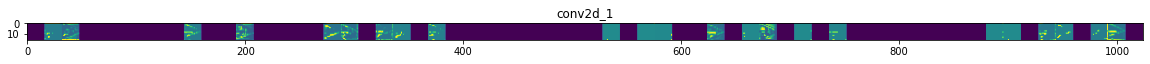

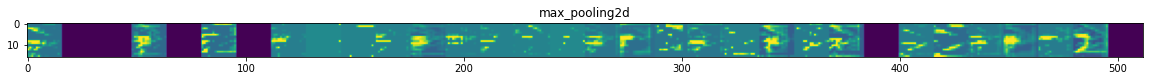

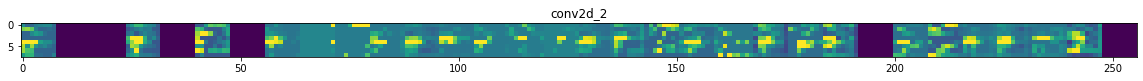

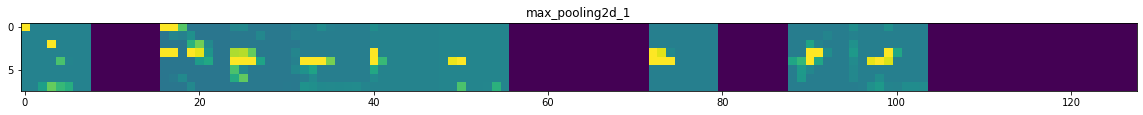

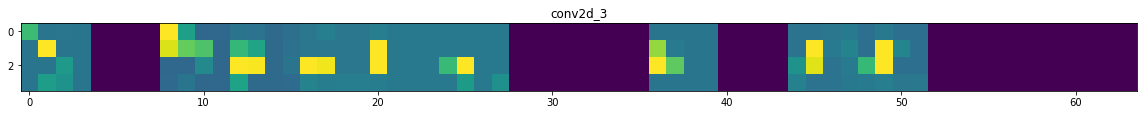

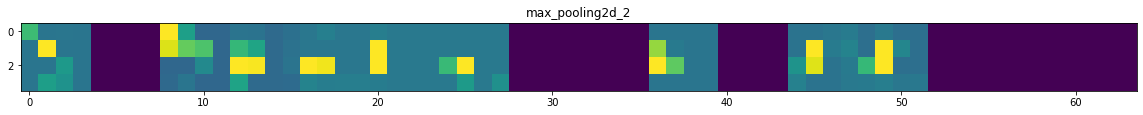

In [12]:
img_path='/content/test/5.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(64,64))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )


In [13]:
l1 = []
for key in res.keys():
    l1.append(int(res[key]))
print(l1)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [14]:
l2 = [1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0]
len(l2),len(l1)

(98, 98)

In [15]:
acc = 0
for i in range(98):
    acc += (l1[i] == l2[i])
print(acc/len(l1))

0.9183673469387755


In [16]:
import json
def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)
def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

write_json('/content/drive/MyDrive/solution.json', res)
